## Task 5: 5) Implementation of Evaluation
 Implement an evaluation module that compares the outcomes of the two PageRank algorithms with respect to differences in the obtained ranks. Report on the implementation (1 slide).

### Preparing the outcomes of the algorithm

In [60]:
import pandas as pd
# read the outcome files in
ts_df = pd.read_csv('TopicSpecPageRank.csv', delimiter='\t')

In [61]:
basic_df = pd.read_csv('BasicPageRank.csv', delimiter='\t')

In [62]:
ts_df=ts_df.rename(columns={"PPR in/in-degree": "rPPR"})
ts_df=ts_df.sort_values(by='rPPR', ascending=False)
basic_df=basic_df.sort_values(by='PR', ascending=False)

In [6]:
ts_df

,Node,PR,PPR InOut,PPR In,PPR Out,Degree,In-degree,Out-degree,rPPR,Alpha: 0.85
54,653820,0.000675,6.982866e-04,0.000780,6.194374e-04,2,2,0,0.000390,NaN
2024,373863,0.000104,1.007062e-04,0.000110,9.221020e-05,10,1,9,0.000110,NaN
1685,439935,0.000118,9.621778e-05,0.000107,8.624325e-05,2,1,1,0.000107,NaN
778,752014,0.000191,1.820639e-04,0.000204,1.611086e-04,2,2,0,0.000102,NaN
2009,193034,0.000104,7.686650e-05,0.000085,6.871177e-05,1,1,0,0.000085,NaN
...,...,...,...,...,...,...,...,...,...,...
21535,176507,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21536,80731,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21537,199920,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21538,18452,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN


In [7]:
basic_df

,Node,PR,Degree,In-degree,Out-degree
166,351,0.012151,2130,1984,146
1119,375791,0.002411,566,518,48
947,440295,0.002287,212,209,3
3963,388677,0.002063,371,359,12
121,386682,0.001898,476,449,27
...,...,...,...,...,...
19911,23574,0.000012,2,0,2
15623,19211,0.000012,12,0,12
15617,856859,0.000012,3,0,3
15612,51301,0.000012,4,0,4


### Evaluating the similarity / difference between the two ranking outcomes using Kendall tau
(from scratch)

In [8]:
import numpy as np

basic_nodes = basic_df["Node"].to_numpy()
ts_nodes= ts_df["Node"].to_numpy()

In [ ]:
bi_co = (len(ts_nodes)*(len(ts_nodes)-1))*0.5
bi_co

In [ ]:
c_pairs=[]
for xi, v1 in enumerate(basic_nodes):
    for yi, v2 in enumerate(ts_nodes):
        if v1==v2:
            for xj, v3 in enumerate(basic_nodes):
                if xi<xj and v3!=v1:
                    for yj, v4 in enumerate(ts_nodes):
                        if v3==v4 and yi<yj:
                            c_pairs.append([v1,v3])

In [ ]:
arr_c_pairs=np.array(c_pairs)
c_pairs_freq=len(arr_c_pairs)
d_pairs_freq=bi_co-c_pairs_freq

In [ ]:
tau=(c_pairs_freq-d_pairs_freq)/bi_co

In [ ]:
tau

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(50, 10), dpi=80)

nodes=np.c_[ts_nodes, basic_nodes]

plt.imshow(nodes, cmap='hot', interpolation='nearest')
plt.show()

## statistical descriptive comparison of outcomes

In [ ]:
top_basic_df=basic_df[:1000]
top_ts_df=ts_df[:1000]
top_ts_df['Degree'].describe()

In [ ]:
top_basic_df['Degree'].describe()

## Graphical visualization of result

In [ ]:
import networkx as nx

basic_graph = nx.DiGraph()
ts_graph = nx.DiGraph()
g_in = {}
g_out = {}
g_inout = {}
degrees = {'in': 0, 'out': 0, 'inout': 0}
alpha=0.85

file = open('bio-pathways-network.csv', 'r')
for row in file.readlines()[1:]:
    node1, node2 = row.strip().split(",")
    for node in basic_nodes[:10]:
        print("Node1")
        print(node1)
        print("Node")
        print(node)
        if node1 == node:
            basic_graph.add_edge(node1, node2)
            print(node1)
    for node in ts_nodes[:10]:
        if node1 == node:
            ts_graph.add_edge(node1, node2)
file.close()

In [ ]:
import matplotlib.pyplot as plt
subplt1 = plt.subplot()
options = {'node_color': 'black','node_size': 100, 'width': 3,}
nx.draw(ts_graph, **options, with_labels=True)
plt.savefig("basic_graph.png")

### Preparing the outcomes of the algorithm

In [314]:
import pandas as pd
# read the outcome files in
ts_df = pd.read_csv('TopicSpecPageRank.csv', delimiter='\t')

In [315]:
basic_df = pd.read_csv('BasicPageRank.csv', delimiter='\t')

In [316]:
ts_df=ts_df.rename(columns={"PPR in/in-degree": "rPPR"})
ts_df=ts_df.sort_values(by='rPPR', ascending=False)
basic_df=basic_df.sort_values(by='PR', ascending=False)

In [317]:
ts_df

,Node,PR,PPR InOut,PPR In,PPR Out,Degree,In-degree,Out-degree,rPPR,Alpha: 0.85
54,653820,0.000675,6.982866e-04,0.000780,6.194374e-04,2,2,0,0.000390,NaN
2024,373863,0.000104,1.007062e-04,0.000110,9.221020e-05,10,1,9,0.000110,NaN
1685,439935,0.000118,9.621778e-05,0.000107,8.624325e-05,2,1,1,0.000107,NaN
778,752014,0.000191,1.820639e-04,0.000204,1.611086e-04,2,2,0,0.000102,NaN
2009,193034,0.000104,7.686650e-05,0.000085,6.871177e-05,1,1,0,0.000085,NaN
...,...,...,...,...,...,...,...,...,...,...
21535,176507,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21536,80731,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21537,199920,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN
21538,18452,0.000012,2.879720e-07,0.000000,5.628240e-07,1,0,1,NaN,NaN


In [318]:
basic_df

,Node,PR,Degree,In-degree,Out-degree
166,351,0.012151,2130,1984,146
1119,375791,0.002411,566,518,48
947,440295,0.002287,212,209,3
3963,388677,0.002063,371,359,12
121,386682,0.001898,476,449,27
...,...,...,...,...,...
19911,23574,0.000012,2,0,2
15623,19211,0.000012,12,0,12
15617,856859,0.000012,3,0,3
15612,51301,0.000012,4,0,4


### Evaluating the similarity / difference between the two ranking outcomes using Kendall tau
(from scratch)

In [64]:
import numpy as np

basic_nodes = basic_df["Node"].to_numpy()
ts_nodes= ts_df["Node"].to_numpy()

In [306]:
bi_co = (len(ts_nodes)*(len(ts_nodes)-1))*0.5
bi_co

4753.0

In [307]:
c_pairs=[]
for xi, v1 in enumerate(basic_nodes):
    for yi, v2 in enumerate(ts_nodes):
        if v1==v2:
            for xj, v3 in enumerate(basic_nodes):
                if xi<xj and v3!=v1:
                    for yj, v4 in enumerate(ts_nodes):
                        if v3==v4 and yi<yj:
                            c_pairs.append([v1,v3])

In [308]:
arr_c_pairs=np.array(c_pairs)
c_pairs_freq=len(arr_c_pairs)
d_pairs_freq=bi_co-c_pairs_freq

In [309]:
tau=(c_pairs_freq-d_pairs_freq)/bi_co

In [310]:
tau

0.5644855880496529

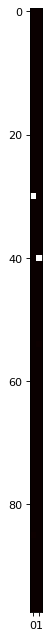

In [327]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(50, 10), dpi=80)

nodes=np.c_[ts_nodes, basic_nodes]

plt.imshow(nodes, cmap='hot', interpolation='nearest')
plt.show()

## statistical descriptive comparison of outcomes

In [335]:
top_basic_df=basic_df[:1000]
top_ts_df=ts_df[:1000]
top_ts_df['Degree'].describe()

count    1000.000000
mean       15.221000
std        28.495406
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max       371.000000
Name: Degree, dtype: float64

In [336]:
top_basic_df['Degree'].describe()

count    1000.000000
mean      204.219000
std       168.377594
min         2.000000
25%       102.000000
50%       164.500000
75%       264.000000
max      2130.000000
Name: Degree, dtype: float64

## Graphical visualization of result

In [85]:
import networkx as nx

basic_graph = nx.DiGraph()
ts_graph = nx.DiGraph()
graph = nx.DiGraph()
g_in = {}
g_out = {}
g_inout = {}
degrees = {'in': 0, 'out': 0, 'inout': 0}
alpha=0.85

basic_pr=[]
file = open('bio-pathways-network.csv', 'r')
for row in file.readlines()[1:]:
    node1, node2 = row.strip().split(",")
    if node1 != node2:
        graph.add_edge(node1, node2)
    for nodeb in basic_df[:10].iterrows():
        if node1 == str(nodeb):
            basic_graph.add_edge(node1, node2)

    for nodet in ts_nodes[:10]:
        if node1 == str(nodet):
            ts_graph.add_edge(node1, node2)
file.close()

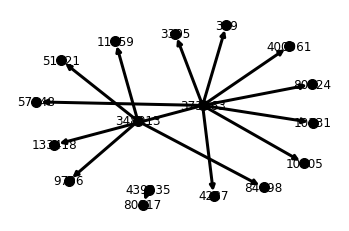

In [14]:
import matplotlib.pyplot as plt
subplt1 = plt.subplot()
options = {'node_color': 'black','node_size': 100, 'width': 3,}
nx.draw(ts_graph, **options, with_labels=True)
plt.savefig("basic_graph.png")

Source: https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5

In [20]:
from matplotlib import cm
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]

# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([basic_graph.degree(v) for v in basic_graph],0.0,0.9)
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100]

basic_pr=basic_df['PR']
s =  rescale([v for v in basic_pr[:10]],1500,7000)


ValueError: s must be a scalar, or float array-like with the same size as x and y

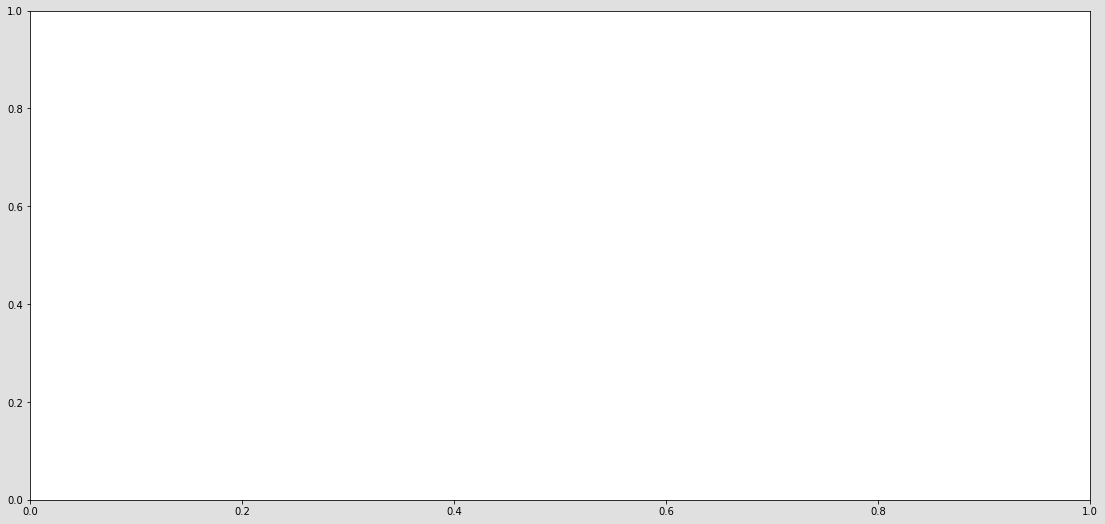

In [21]:
pos = nx.spring_layout(basic_graph)
plt.figure(figsize=(19,9),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(basic_graph, pos=pos, with_labels=True, node_color=c, node_size=s,
                 font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()